In [1]:
import sys
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_root = '../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = f'{path_root}/data'
# Paths dependant on path_data
path_img_root =  f'{path_data}/imgs/grafici/{level}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/covid19-{level}.csv'

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
# df_n_raw
list(df_n_raw.columns)

['data',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'ingressi_terapia_intensiva',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'variazione_terapia_intensiva',
 'variazione_ricoverati_con_sintomi',
 'variazione_totale_ospedalizzati',
 'variazione_isolamento_domiciliare',
 'nuovi_dimessi_guariti',
 'nuovi_deceduti',
 'nuovi_tamponi',
 'nuovi_casi_testati',
 'ti_su_to',
 'to_su_tp',
 'np_su_nt',
 'np_su_nct',
 'var_ti_perc',
 'var_pos_perc',
 'np_log']

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 219441
Nuovi tamponi: 1138310.0
Percentuale nuovi positivi/nuovi tamponi: 19.0 %
Nuovi guariti: 46770.0
Nuovi deceduti: 198.0
Variazione positivi ricoverati con sintomi: 463.0
Variazione positivi in terapia intensiva: 39.0
Variazione positivi in isolamento dimiciliare: 171960.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2022, 1, 6, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc,np_log
0,2021-11-07T17:00:00,3215,398,3613,93380,96987,3294,5822,4578669,132385,...,20.0,434771.0,52337.0,11.02,3.73,1.34,11.12,1.53,3.52,3.765072
1,2021-11-08T17:00:00,3362,415,3777,94998,98775,1788,4197,4581396,132423,...,38.0,249115.0,36182.0,10.99,3.82,1.68,11.60,4.27,1.84,3.622939
2,2021-11-09T17:00:00,3436,421,3857,96348,100205,1430,6032,4586009,132491,...,68.0,645689.0,65983.0,10.92,3.85,0.93,9.14,1.45,1.45,3.780461
3,2021-11-10T17:00:00,3447,423,3870,98989,102859,2654,7891,4591328,132551,...,60.0,487618.0,67218.0,10.93,3.76,1.62,11.74,0.48,2.65,3.897132
4,2021-11-11T17:00:00,3509,422,3931,102989,106920,4061,8569,4595897,132618,...,67.0,595812.0,65101.0,10.74,3.68,1.44,13.16,-0.24,3.95,3.932930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-01-02T17:00:00,11756,1319,13075,1057462,1070537,48744,61046,5119893,137646,...,133.0,278654.0,92074.0,10.09,1.22,21.91,66.30,1.70,4.77,4.785657
57,2022-01-03T17:00:00,12333,1351,13684,1111368,1125052,54515,68052,5133272,137786,...,140.0,445321.0,89232.0,9.87,1.22,15.28,76.26,2.43,5.09,4.832841
58,2022-01-04T17:00:00,12912,1392,14304,1250993,1265297,140245,170844,5163605,138045,...,259.0,1228410.0,208398.0,9.73,1.13,13.91,81.98,3.03,12.47,5.232600
59,2022-01-05T17:00:00,13364,1428,14792,1406325,1421117,155820,189109,5196642,138276,...,231.0,1094255.0,208935.0,9.65,1.04,17.28,90.51,2.59,12.31,5.276712


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'nuovi_tamponi': {'label': 'Nuovi tamponi', 'file_name': 'nuovi_tamponi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'},
              'np_log': {'label': 'Nuovi positivi in scala logaritmica', 'file_name': 'nuovi_positivi_log'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

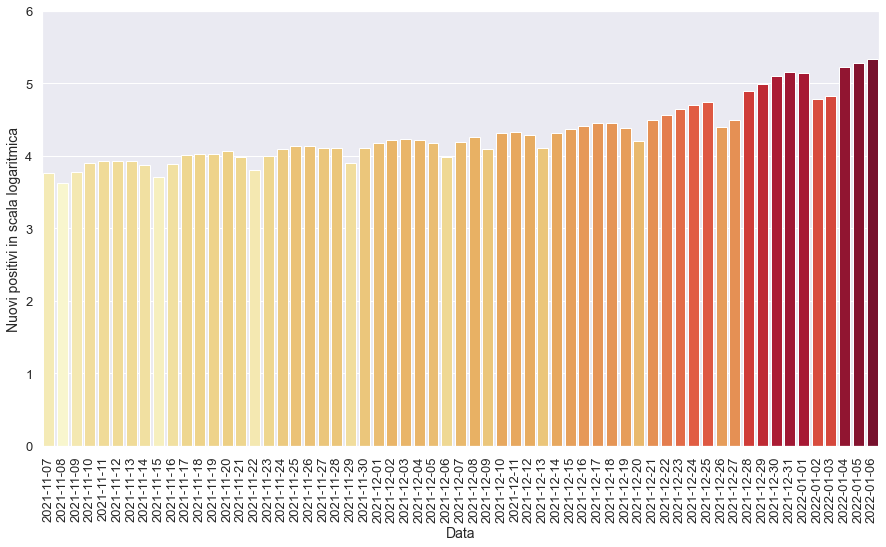

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_log'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

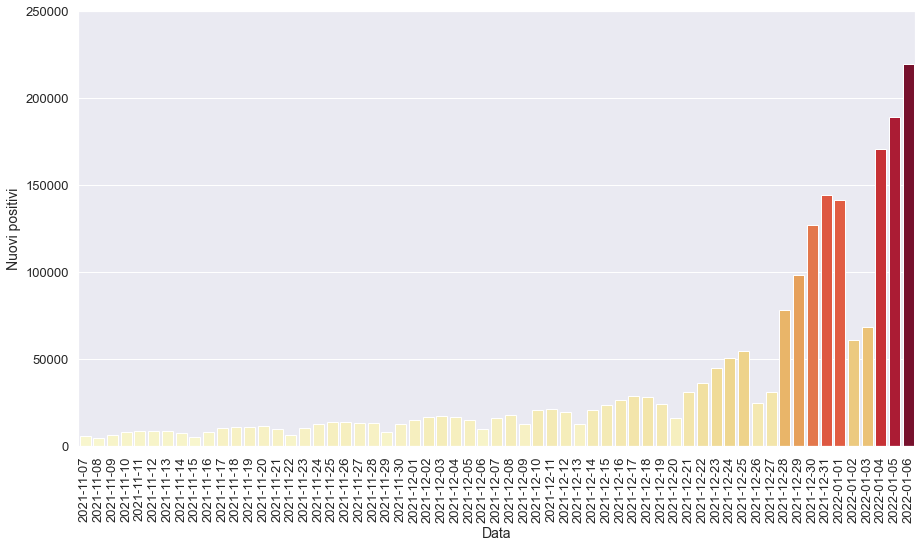

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

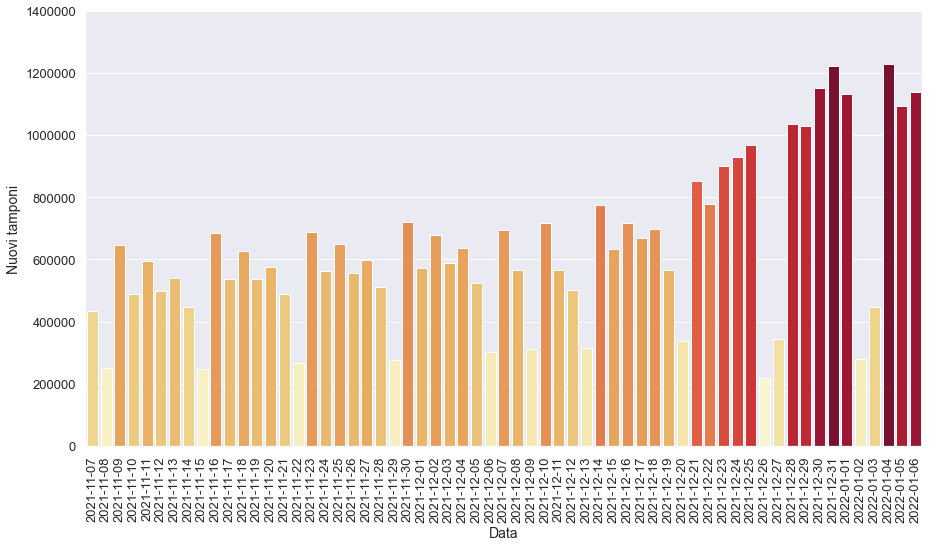

In [9]:
# New swabs
y_col = 'nuovi_tamponi'
fig = bp.draw_bar_plot(y_col=y_col)

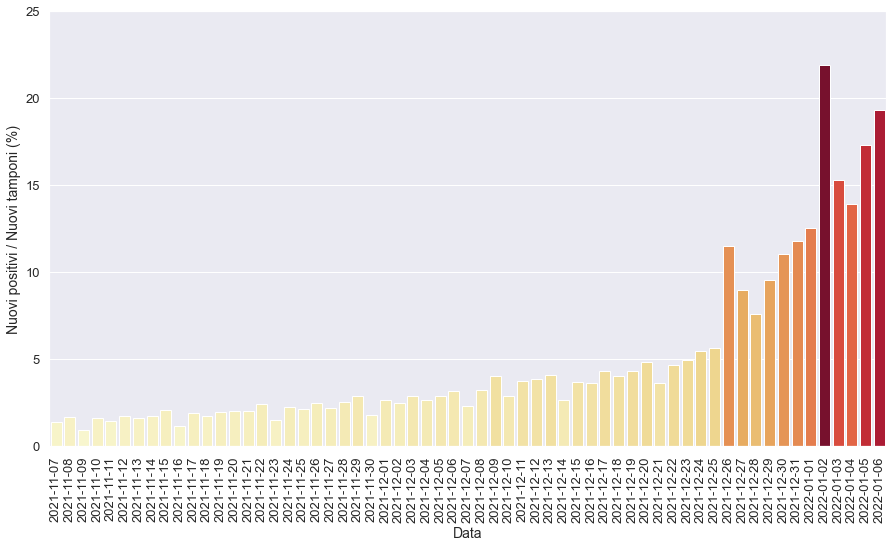

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

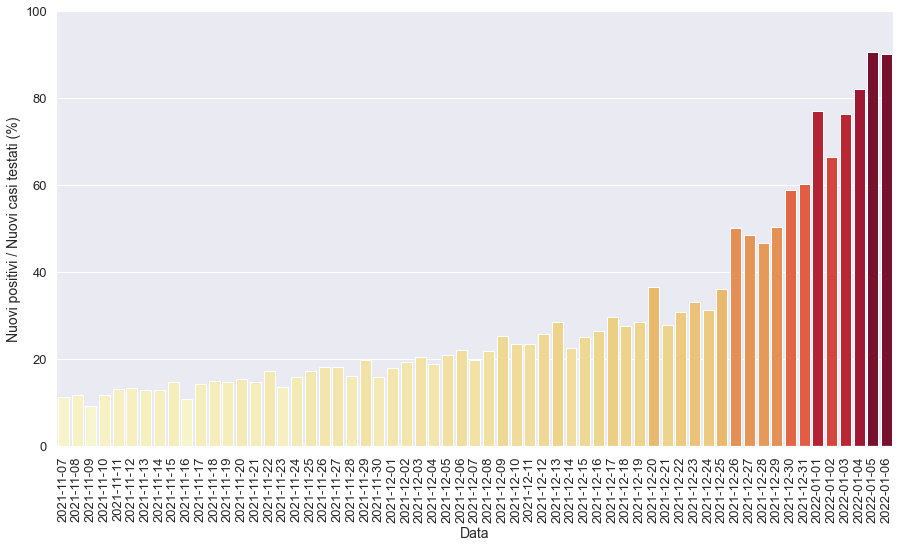

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

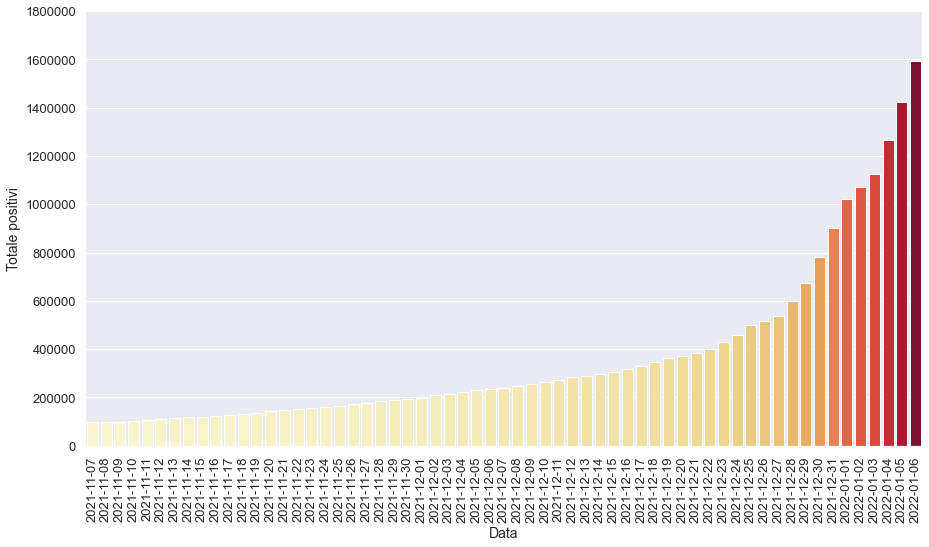

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

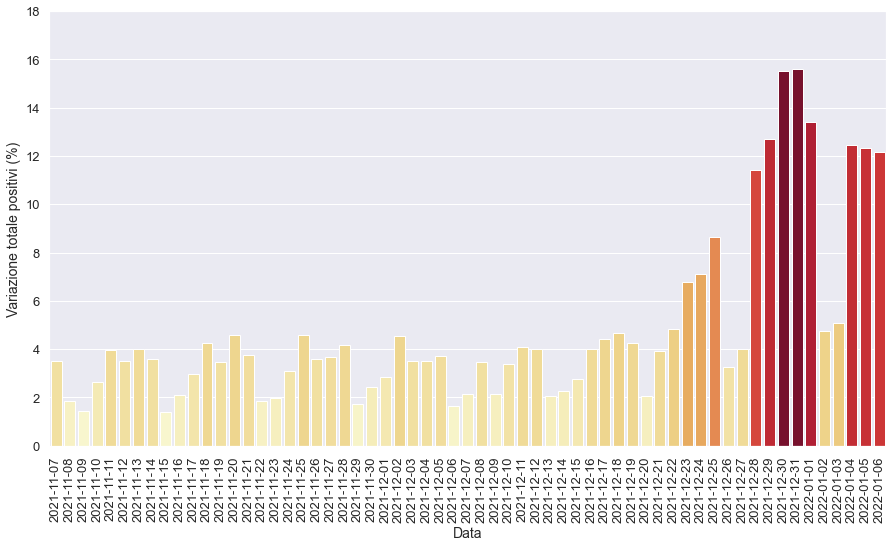

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

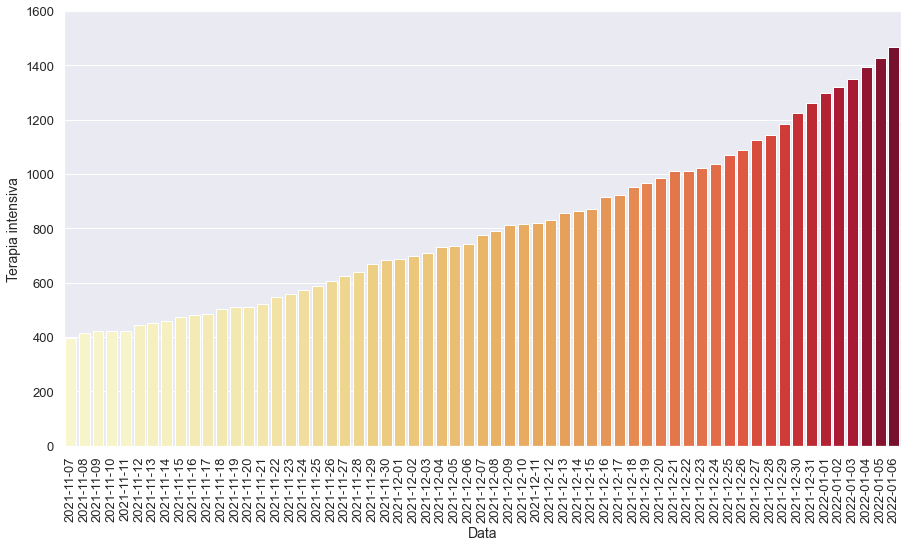

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

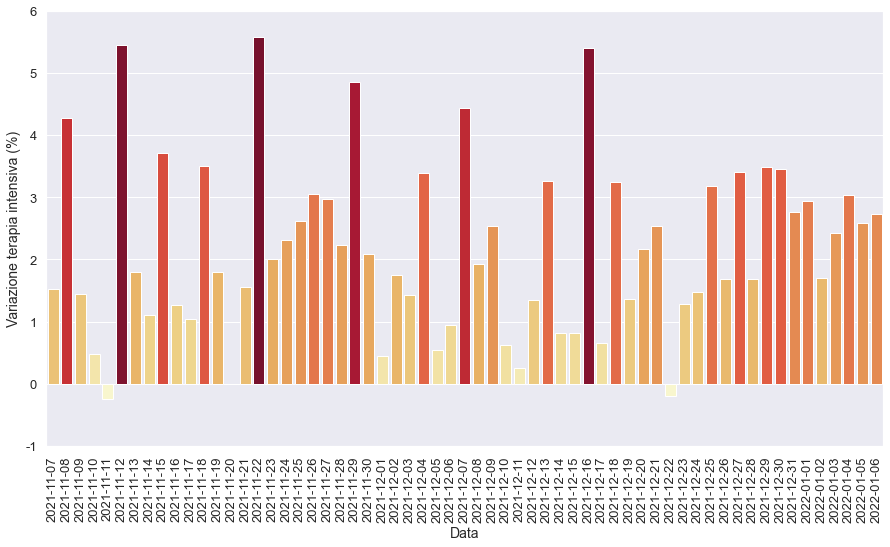

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

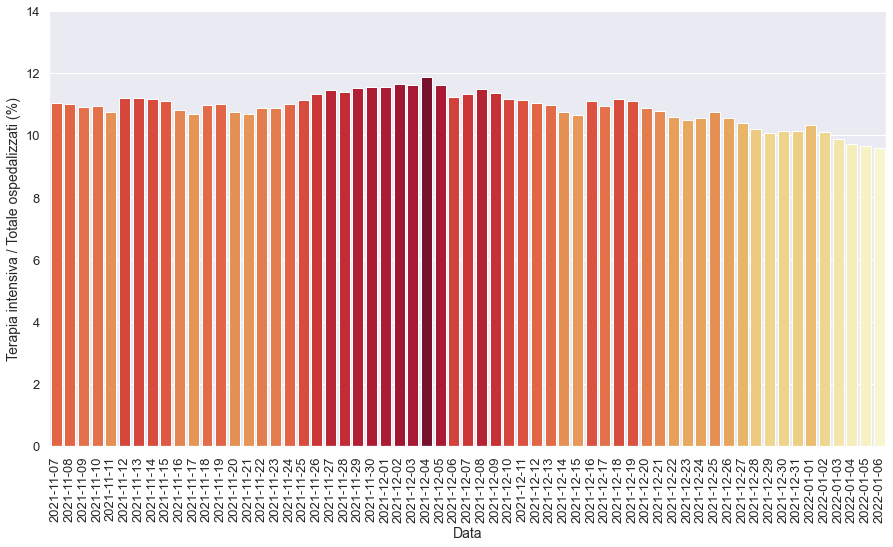

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

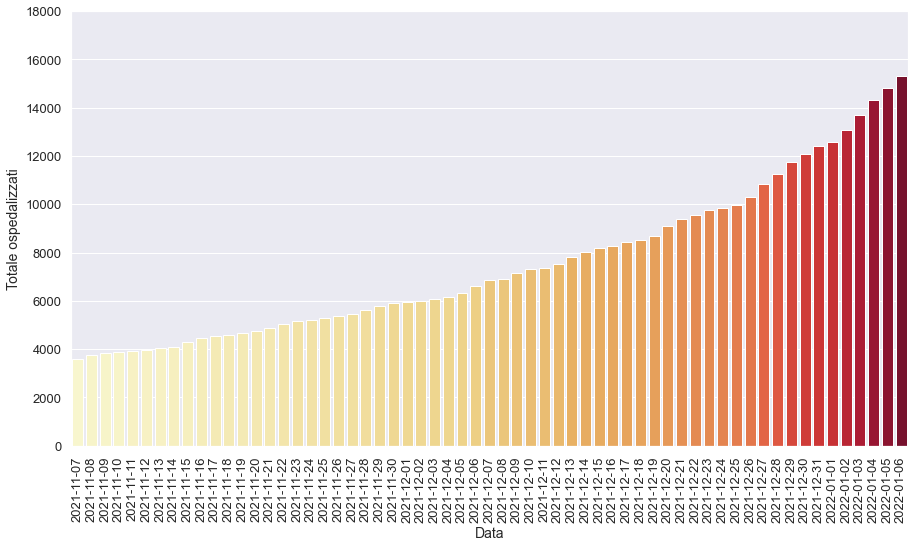

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

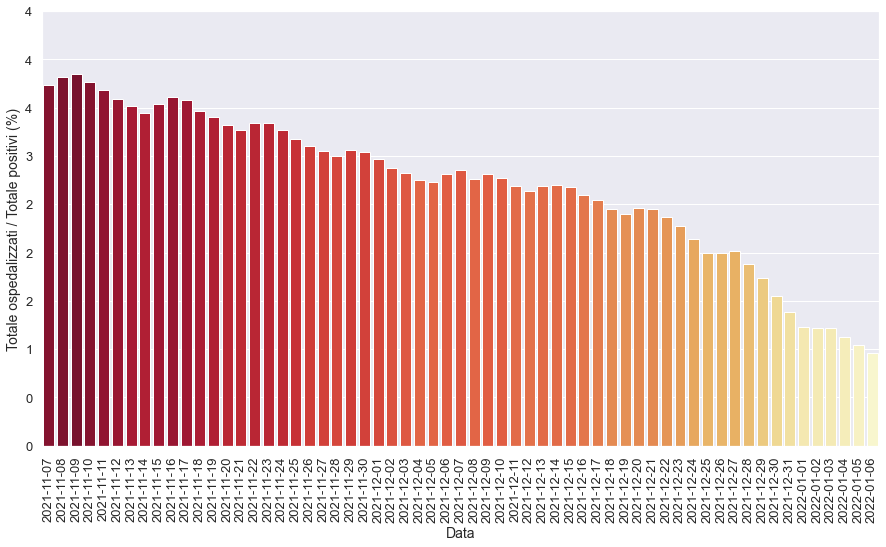

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

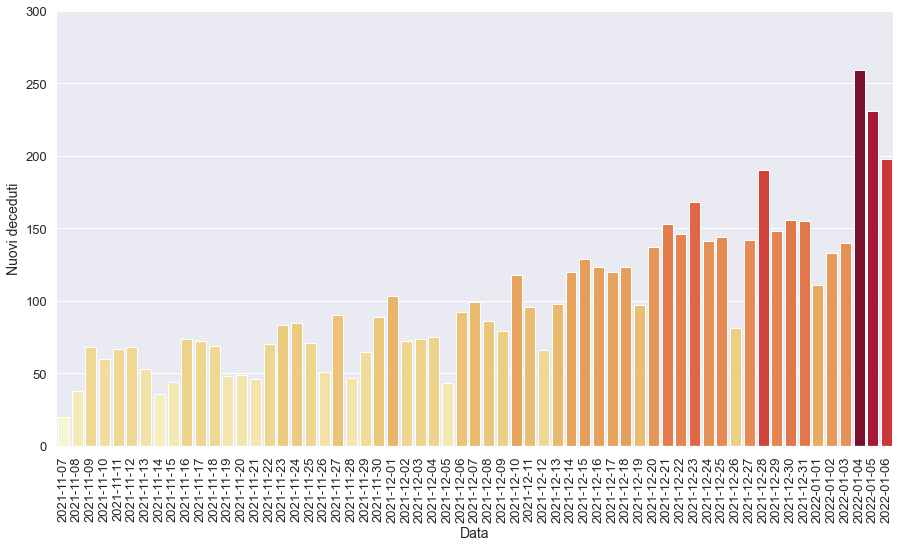

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

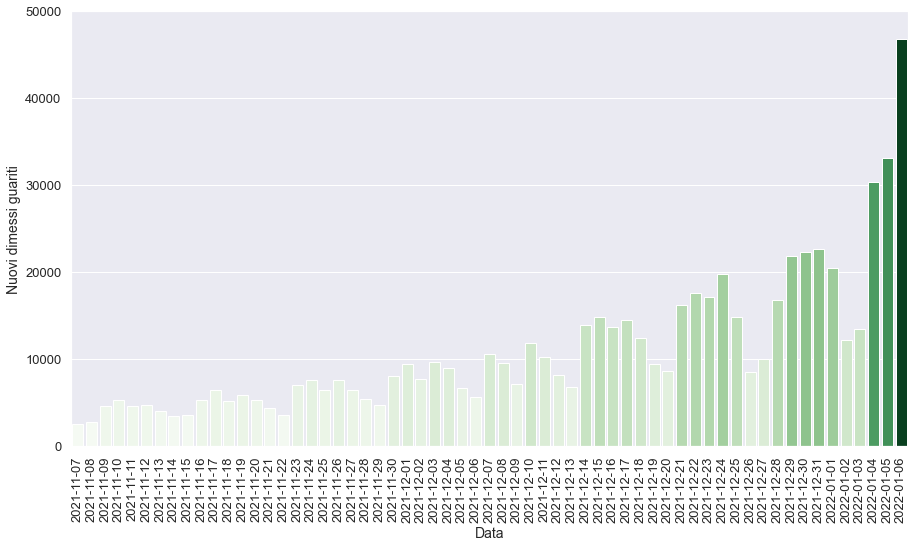

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-12-07T17:00:00,6078,776,6854,234040,240894,5059,15756,4759038,134386,...,10584.0,99.0,695136.0,80205.0,11.32,2.85,2.27,19.64,4.44,2.15
1,2021-12-08T17:00:00,6099,791,6890,242324,249214,8320,17959,4768578,134472,...,9540.0,86.0,564698.0,82085.0,11.48,2.76,3.18,21.88,1.93,3.45
2,2021-12-09T17:00:00,6333,811,7144,247409,254553,5339,12527,4775676,134551,...,7098.0,79.0,312828.0,49681.0,11.35,2.81,4.00,25.21,2.53,2.14
3,2021-12-10T17:00:00,6483,816,7299,255849,263148,8595,20497,4787453,134669,...,11777.0,118.0,716287.0,87290.0,11.18,2.77,2.86,23.48,0.62,3.38
4,2021-12-11T17:00:00,6539,818,7357,266525,273882,10734,21042,4797658,134765,...,10205.0,96.0,565077.0,90254.0,11.12,2.69,3.72,23.31,0.25,4.08
5,2021-12-12T17:00:00,6697,829,7526,277351,284877,10995,19215,4805809,134831,...,8151.0,66.0,501815.0,74751.0,11.02,2.64,3.83,25.71,1.34,4.01
6,2021-12-13T17:00:00,6951,856,7807,282950,290757,5880,12712,4812535,134929,...,6726.0,98.0,313536.0,44703.0,10.96,2.69,4.05,28.44,3.26,2.06
7,2021-12-14T17:00:00,7163,863,8026,289368,297394,6637,20677,4826443,135049,...,13908.0,120.0,776563.0,91956.0,10.75,2.70,2.66,22.49,0.82,2.28
8,2021-12-15T17:00:00,7309,870,8179,297474,305653,8259,23195,4841245,135178,...,14802.0,129.0,634638.0,93081.0,10.64,2.68,3.65,24.92,0.81,2.78
9,2021-12-16T17:00:00,7338,917,8255,309675,317930,12277,26109,4854949,135301,...,13704.0,123.0,718281.0,99271.0,11.11,2.60,3.63,26.30,5.40,4.02


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

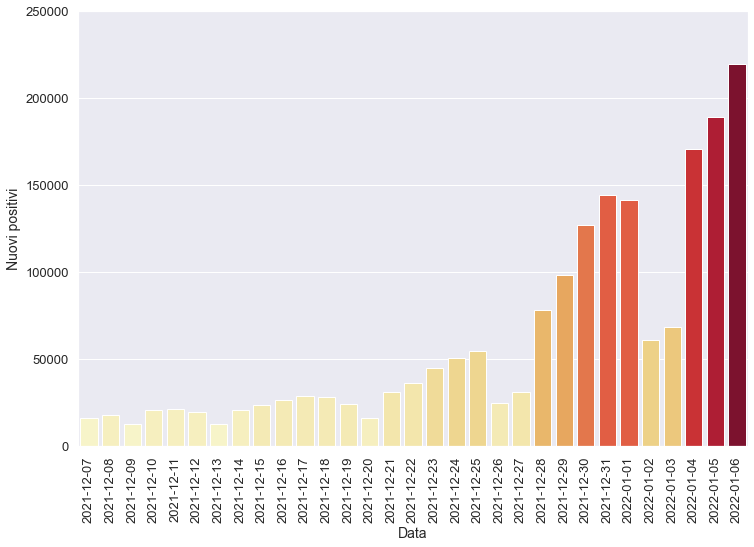

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

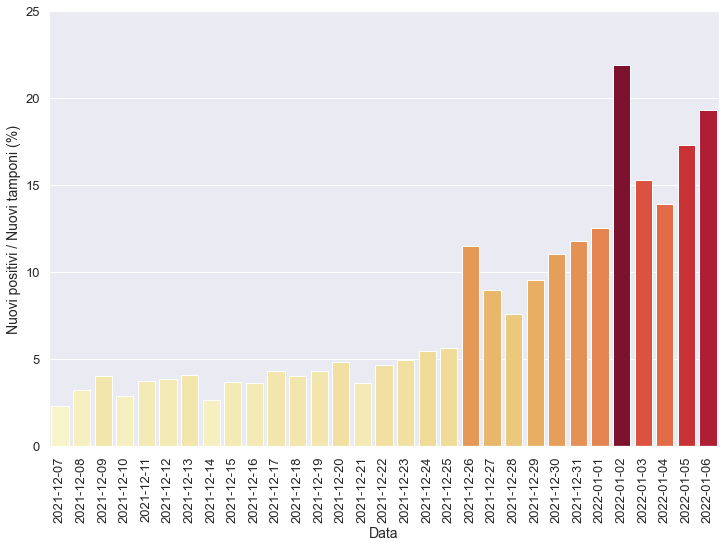

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

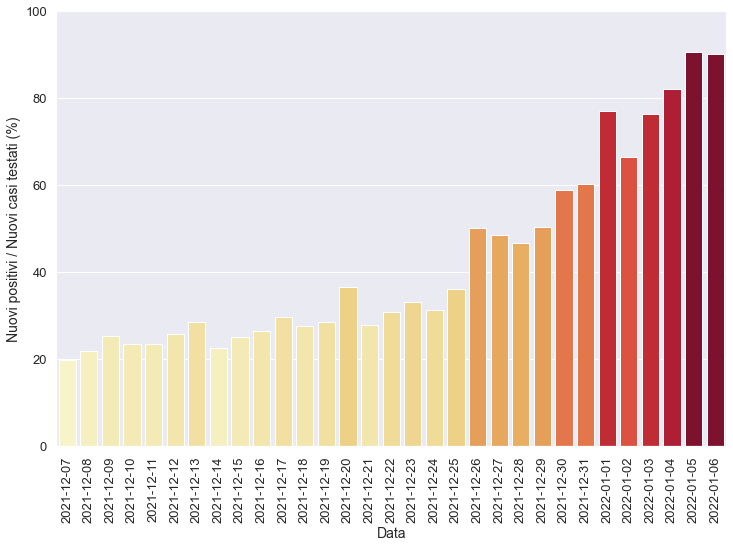

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

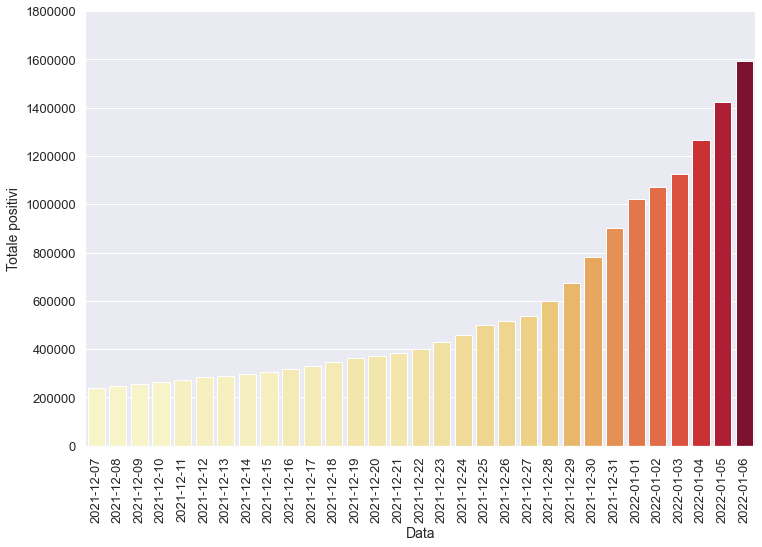

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

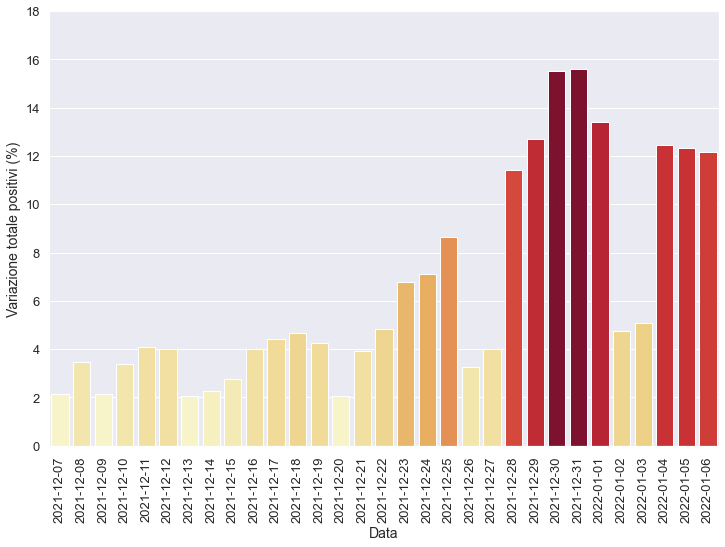

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

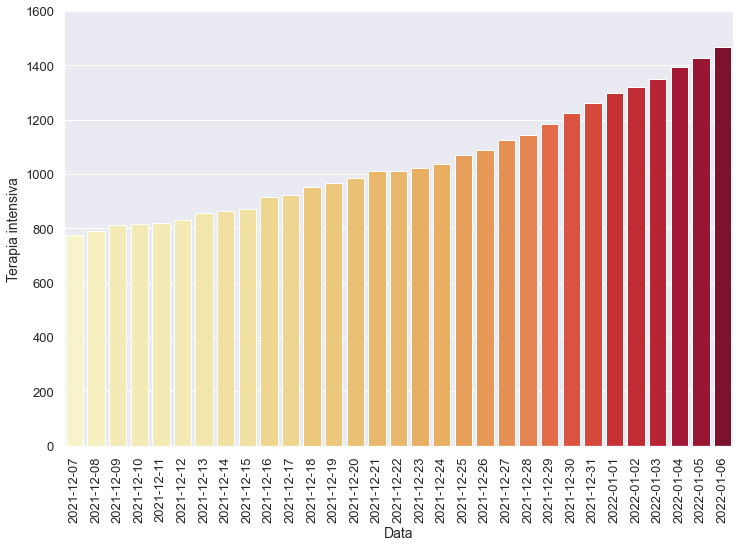

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

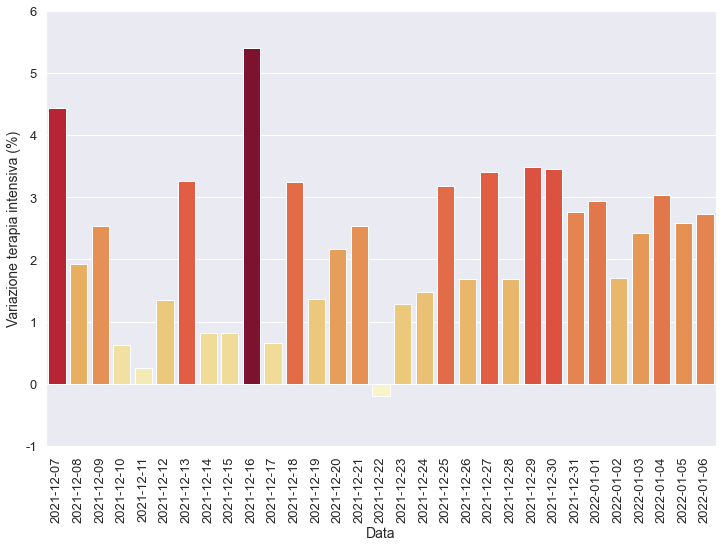

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

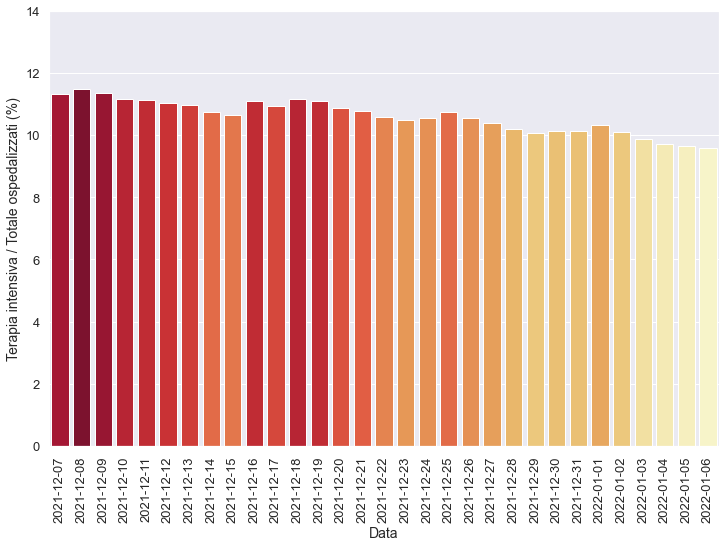

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

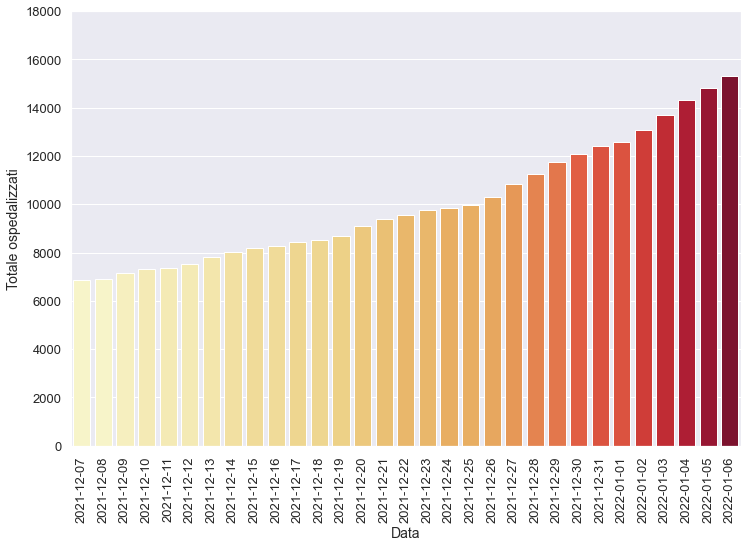

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

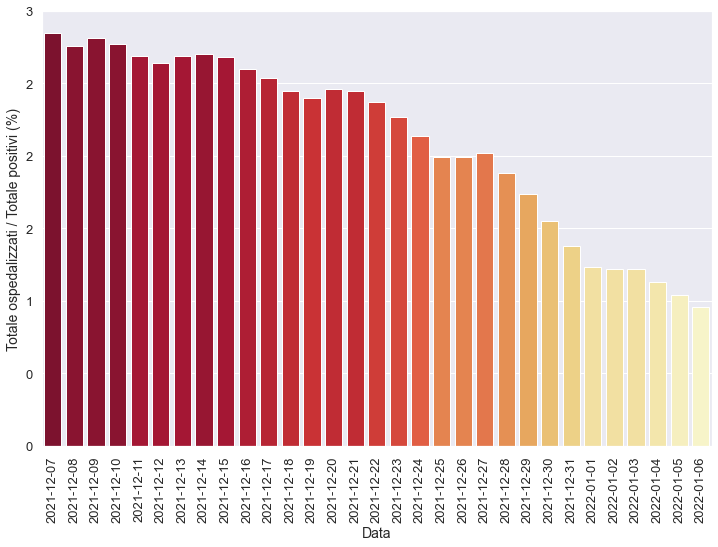

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

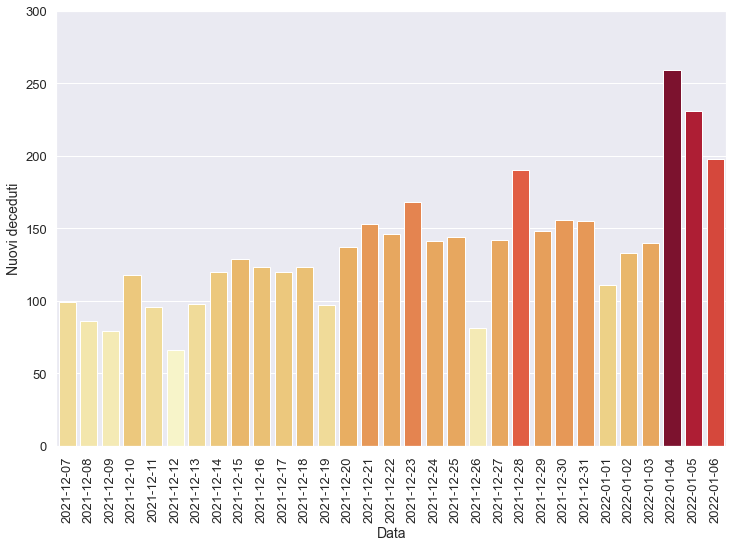

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

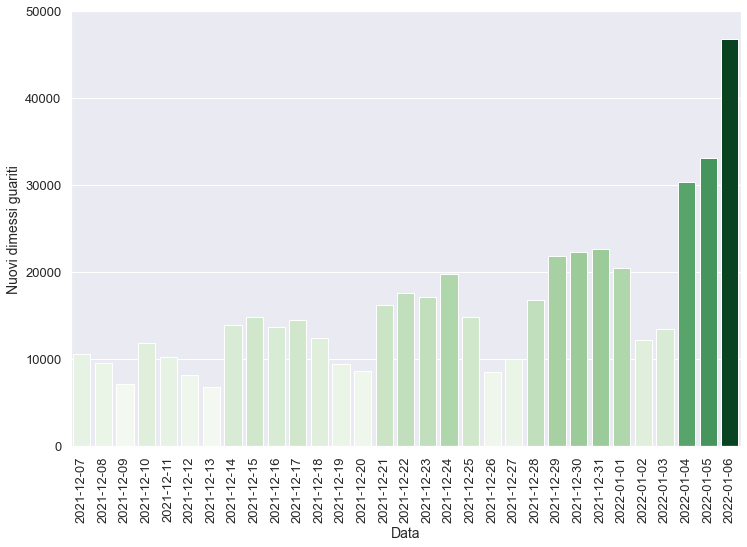

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-12-30T17:00:00,10866,1226,12092,767371,779463,104598,126888,5064718,137247,...,22246.0,156.0,1150352.0,216018.0,10.14,1.55,11.03,58.74,3.46,15.50
1,2021-12-31T17:00:00,11150,1260,12410,888574,900984,121521,144243,5087297,137402,...,22579.0,155.0,1224025.0,240039.0,10.15,1.38,11.78,60.09,2.77,15.59
2,2022-01-01T17:00:00,11265,1297,12562,1009231,1021793,120809,141358,5107729,137513,...,20432.0,111.0,1130936.0,183845.0,10.32,1.23,12.50,76.89,2.94,13.41
3,2022-01-02T17:00:00,11756,1319,13075,1057462,1070537,48744,61046,5119893,137646,...,12164.0,133.0,278654.0,92074.0,10.09,1.22,21.91,66.30,1.70,4.77
4,2022-01-03T17:00:00,12333,1351,13684,1111368,1125052,54515,68052,5133272,137786,...,13379.0,140.0,445321.0,89232.0,9.87,1.22,15.28,76.26,2.43,5.09
5,2022-01-04T17:00:00,12912,1392,14304,1250993,1265297,140245,170844,5163605,138045,...,30333.0,259.0,1228410.0,208398.0,9.73,1.13,13.91,81.98,3.03,12.47
6,2022-01-05T17:00:00,13364,1428,14792,1406325,1421117,155820,189109,5196642,138276,...,33037.0,231.0,1094255.0,208935.0,9.65,1.04,17.28,90.51,2.59,12.31
7,2022-01-06T17:00:00,13827,1467,15294,1578285,1593579,172462,219441,5243412,138474,...,46770.0,198.0,1138310.0,243293.0,9.59,0.96,19.28,90.20,2.73,12.14


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

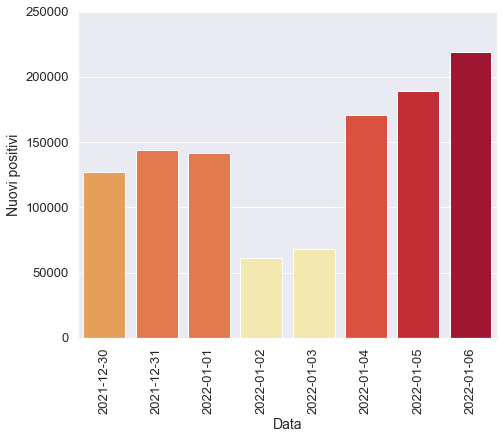

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

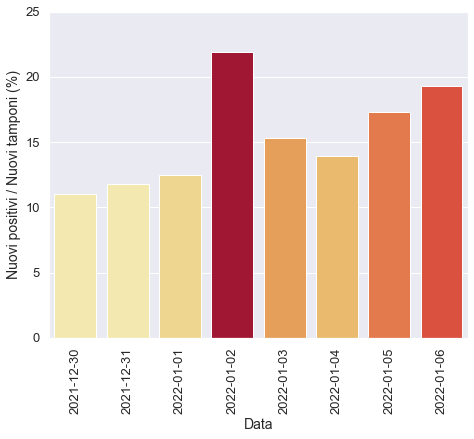

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

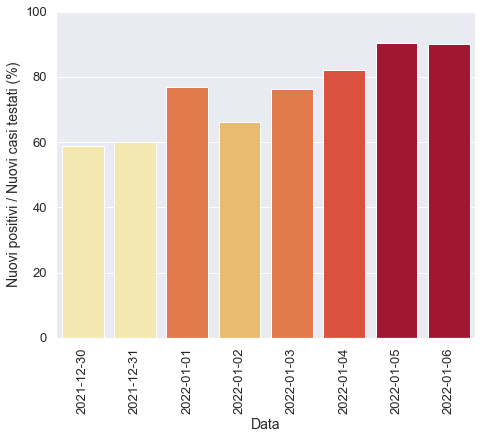

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

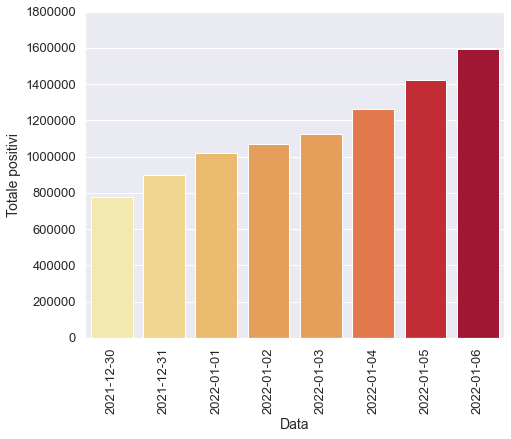

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

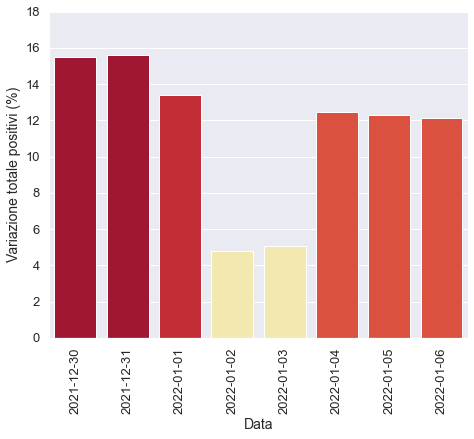

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

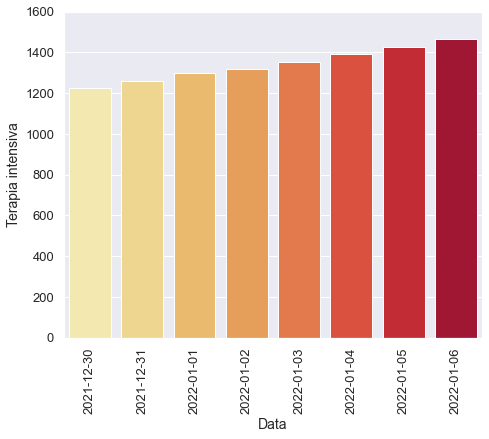

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

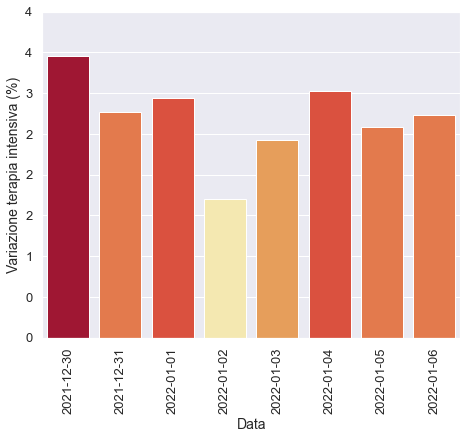

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

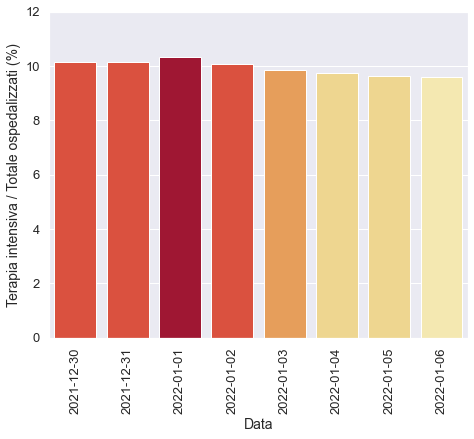

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

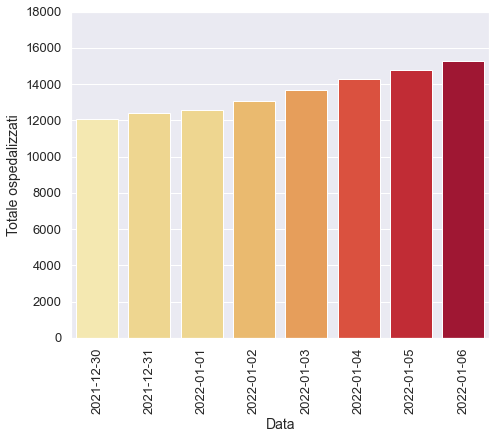

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

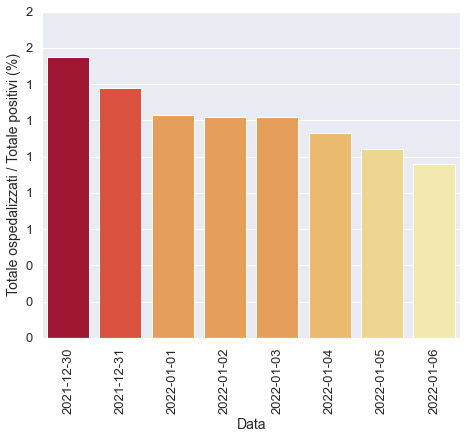

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

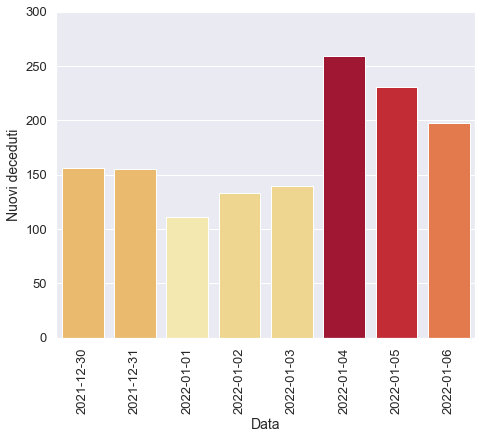

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

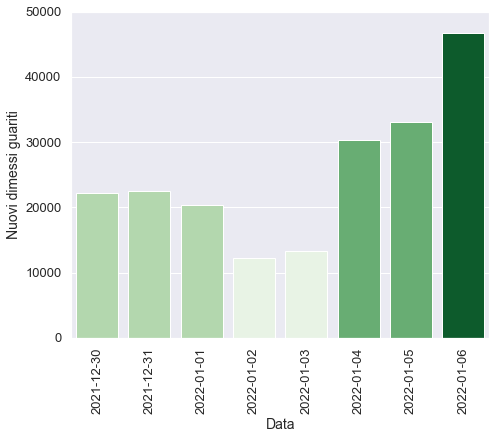

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)